<a href="https://colab.research.google.com/github/saribasmetehan/beginner-to-intermediate-ml-projects/blob/main/knn_diabetes_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Veri seti yüklemek ve gözlemlemek
veri seti : https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset/data

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('diabetes.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
dataset.shape

(768, 9)

In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


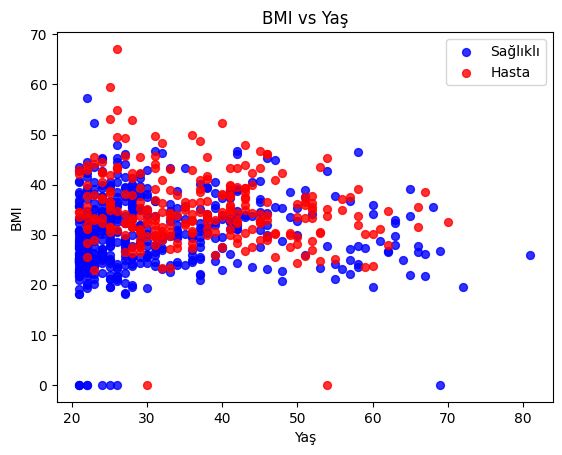

In [5]:
saglıklı = dataset[dataset.Outcome == 0]
hasta = dataset[dataset.Outcome == 1]

plt.scatter(saglıklı['Age'], saglıklı['BMI'], s=32, alpha=0.8, c='blue', label='Sağlıklı')
plt.scatter(hasta['Age'], hasta['BMI'], s=32, alpha=0.8, c='red', label='Hasta')
plt.xlabel('Yaş')
plt.ylabel('BMI')
plt.title('BMI vs Yaş')
plt.legend()
plt.show()

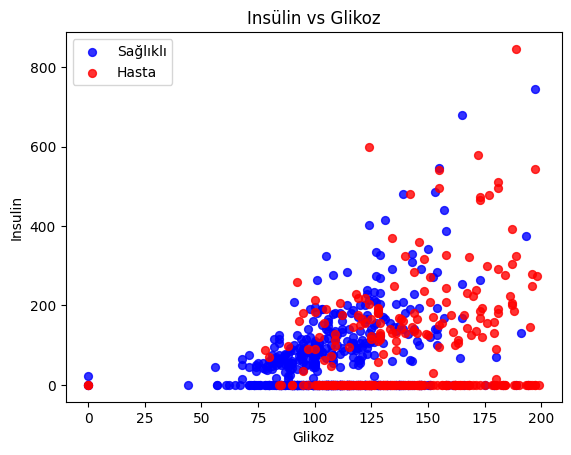

In [6]:
saglıklı = dataset[dataset.Outcome == 0]
hasta = dataset[dataset.Outcome == 1]

plt.scatter(saglıklı['Glucose'], saglıklı['Insulin'], s=32, alpha=0.8, c='blue', label='Sağlıklı')
plt.scatter(hasta['Glucose'], hasta['Insulin'], s=32, alpha=0.8, c='red', label='Hasta')
plt.xlabel('Glikoz')
plt.ylabel('Insulin')
plt.title('Insülin vs Glikoz')
plt.legend()
plt.show()

# Veri ön işleme

In [7]:
x = dataset.drop(['Outcome'], axis=1)
y = dataset['Outcome']

In [8]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [9]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


*Normalizasyon*

In [10]:
x = (x - x.min()) / (x.max() - x.min())

In [11]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


# Model eğitimi ve K değerleri gözlemlemek

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

0.6948051948051948

In [13]:
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    print(k, knn.score(x_test, y_test))

1 0.6688311688311688
2 0.6818181818181818
3 0.6948051948051948
4 0.6688311688311688
5 0.6883116883116883
6 0.6818181818181818
7 0.6753246753246753
8 0.6948051948051948
9 0.6948051948051948
10 0.7142857142857143


# Tahmin

In [18]:
tahlil = np.array([6, 148, 72, 35, 0, 33.6, 0.627, 50]).reshape(1, -1)

x_min = x.min().to_numpy()  #
x_max = x.max().to_numpy()

tahlil_normalized = (tahlil - x_min) / (x_max - x_min)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

test_sonucu = knn.predict(tahlil_normalized)
print(test_sonucu)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
